# XAI - 2025 - TP1 - Feature Selection


But du TP: 

- Explorer plus en profondeur la sélection d'attributs (Feature Selection) dans une optique d'interprétabilité. Répondez aux questions et complétez le code directement dans le notebook et n'oubliez pas de changer le nom du fichier avec votre nom et prénom. 

Rendu du TP: 

- Durée 2 semaines
- Mercredi 12 mars 2025 23h59, Cyberlearn

Description: 

   - Le dataset [MILE](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE13159) contient pour ~2000 patients les données d'expression d'environ 54'000 gènes. Afin d'accélérer le début de ce TP, les features ont déjà été écrémées grâce à trois méthodes différentes (chi2, mutual_information et f_score) qui ont chacunes retourné les 5000 meilleures variables (features). 

Dans ce travail vous devrez: 

1. Comparer les features sélectionnées par les premières méthodes de filtre et en retourner un subset adéquat.

     
2. Appliquer méthodes wrapper sur le dataset choisi

    a. RFE-RF
    
    b. RFE-SVM


3. Entrainer un modèle et en extraire les features les plus importantes

    a. Random Forest (RF)
    
    b. Support Vector Machine (SVM)
    
    
4. Sélectionner les attributs les plus pertinents

    a. Entrainer des modèles (RF et SVM) avec le dataset réduit 


5. Essayez une méthode d'ensemble pour la feature selection


6. Analyse des résultats

---

## 1) Filter methods

Trois méthodes de *features selection* ont été préalablement appliquées au dataset original afin de vous éviter un temps de calcul trop long. De ce dataset, qui contient 54'000 attributs (ou features, ou variables), chaque méthode en a retenu 5000 qui sont présents dans les trois fichiers csv joints et qui sont lus ci-dessous. 

- Explorez rapidement les données
- Exécutez et comprenez le code ci-dessous et répondez aux questions.

In [40]:
# Si nécessaire installez les packages suivants:

#!conda install scikit-learn
#!pip install matplotlib_venn

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
# Load the three datasets with each 5000 variables previously selected with the 
# sklearn.SelectKBest method with the following scoring functions (filters)

# - mutual_information_score
# - chi2
# - f_classifier

# Note: leukemia_class will be considered a feature and replaced at the end !

features_df_mutual_5000 = pd.read_csv("./data/features_df_mutual_5000.csv", index_col='ID_REF')
features_df_chi2_5000 = pd.read_csv("./data/features_df_chi2_5000.csv", index_col='ID_REF')
features_df_fc_5000 = pd.read_csv("./data/features_df_fc_5000.csv", index_col='ID_REF')

In [43]:
# Explorez rapidement les 3 DataFrames pour bien comprendre les données. 
print('features_df_mutual_5000')
display(features_df_mutual_5000.head())
print('features_df_chi2_5000')
display(features_df_chi2_5000.head())
print('features_df_fc_5000')
display(features_df_fc_5000.head())

features_df_mutual_5000


,1007_s_at,1552256_a_at,1552257_a_at,1552275_s_at,1552287_s_at,1552348_at,1552398_a_at,1552401_a_at,1552426_a_at,1552474_a_at,...,59697_at,60471_at,65086_at,65493_at,65718_at,74694_s_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,leukemia_class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM329407,0.361346,0.574043,0.628138,0.472343,0.516924,0.314686,0.581724,0.221830,0.597184,0.336339,...,0.390957,0.601400,0.342838,0.353685,0.178705,0.578544,0.888419,0.849101,0.853764,mature B-ALL with t(8;14)
GSM329408,0.396426,0.491358,0.613357,0.315839,0.497151,0.178905,0.135769,0.213779,0.506186,0.451944,...,0.278969,0.283076,0.381482,0.360903,0.328917,0.512135,0.887359,0.860323,0.857188,mature B-ALL with t(8;14)
GSM329409,0.419317,0.538100,0.515951,0.484980,0.460500,0.309071,0.398421,0.222895,0.499825,0.462034,...,0.237801,0.524817,0.375500,0.271483,0.195627,0.563810,0.881381,0.846586,0.848318,mature B-ALL with t(8;14)
GSM329410,0.424651,0.532619,0.642591,0.575328,0.500163,0.077472,0.370025,0.293621,0.479370,0.230482,...,0.142101,0.409149,0.328101,0.358090,0.307833,0.550666,0.900322,0.843597,0.862650,mature B-ALL with t(8;14)
GSM329411,0.287776,0.407092,0.612719,0.414715,0.459823,0.335911,0.536976,0.259037,0.551757,0.218830,...,0.475415,0.702591,0.228620,0.175773,0.135717,0.441221,0.889136,0.770422,0.824669,mature B-ALL with t(8;14)


features_df_chi2_5000


,1007_s_at,1552256_a_at,1552280_at,1552296_at,1552348_at,1552386_at,1552388_at,1552398_a_at,1552401_a_at,1552422_at,...,50221_at,54037_at,56748_at,57588_at,58780_s_at,59631_at,59697_at,65517_at,65718_at,leukemia_class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM329407,0.361346,0.574043,0.403437,0.248421,0.314686,0.459216,0.104804,0.581724,0.221830,0.095132,...,0.620812,0.438114,0.184329,0.134256,0.350074,0.213531,0.390957,0.148033,0.178705,mature B-ALL with t(8;14)
GSM329408,0.396426,0.491358,0.246029,0.054328,0.178905,0.511325,0.152413,0.135769,0.213779,0.286709,...,0.473104,0.461370,0.115439,0.083487,0.193412,0.067892,0.278969,0.067875,0.328917,mature B-ALL with t(8;14)
GSM329409,0.419317,0.538100,0.212816,0.113116,0.309071,0.296136,0.151793,0.398421,0.222895,0.036946,...,0.529376,0.514960,0.175349,0.133954,0.335776,0.016975,0.237801,0.227789,0.195627,mature B-ALL with t(8;14)
GSM329410,0.424651,0.532619,0.130555,0.082809,0.077472,0.349910,0.070955,0.370025,0.293621,0.128189,...,0.541970,0.467999,0.343024,0.140632,0.267514,0.008864,0.142101,0.048941,0.307833,mature B-ALL with t(8;14)
GSM329411,0.287776,0.407092,0.282652,0.047093,0.335911,0.298619,0.304593,0.536976,0.259037,0.052542,...,0.564680,0.287897,0.194041,0.141353,0.467696,0.213617,0.475415,0.175493,0.135717,mature B-ALL with t(8;14)


features_df_fc_5000


,1007_s_at,1552256_a_at,1552257_a_at,1552275_s_at,1552287_s_at,1552296_at,1552302_at,1552348_at,1552398_a_at,1552401_a_at,...,58780_s_at,59697_at,60471_at,65086_at,65493_at,74694_s_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,leukemia_class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM329407,0.361346,0.574043,0.628138,0.472343,0.516924,0.248421,0.241912,0.314686,0.581724,0.221830,...,0.350074,0.390957,0.601400,0.342838,0.353685,0.578544,0.888419,0.849101,0.853764,mature B-ALL with t(8;14)
GSM329408,0.396426,0.491358,0.613357,0.315839,0.497151,0.054328,0.292557,0.178905,0.135769,0.213779,...,0.193412,0.278969,0.283076,0.381482,0.360903,0.512135,0.887359,0.860323,0.857188,mature B-ALL with t(8;14)
GSM329409,0.419317,0.538100,0.515951,0.484980,0.460500,0.113116,0.225458,0.309071,0.398421,0.222895,...,0.335776,0.237801,0.524817,0.375500,0.271483,0.563810,0.881381,0.846586,0.848318,mature B-ALL with t(8;14)
GSM329410,0.424651,0.532619,0.642591,0.575328,0.500163,0.082809,0.133297,0.077472,0.370025,0.293621,...,0.267514,0.142101,0.409149,0.328101,0.358090,0.550666,0.900322,0.843597,0.862650,mature B-ALL with t(8;14)
GSM329411,0.287776,0.407092,0.612719,0.414715,0.459823,0.047093,0.118265,0.335911,0.536976,0.259037,...,0.467696,0.475415,0.702591,0.228620,0.175773,0.441221,0.889136,0.770422,0.824669,mature B-ALL with t(8;14)


In [44]:
# Get the column names (features names / noms d'attributs)
cols_mutual = list(features_df_mutual_5000.columns)
cols_chi2 = list(features_df_chi2_5000.columns)
cols_fc = list(features_df_fc_5000.columns)

### Total features union

Si l'on prend la totalité des variables choisies par nos trois méthodes, nous obtenons 7615 variables différentes. 

In [45]:
# Total features union
all_features_union = set(cols_mutual + cols_chi2 + cols_fc)
print(len(all_features_union))

7614


### Total features intersection

Si l'on choisi de prendre uniquement les variables sélectionnées par nos trois méthodes, nous obtenons 2458 variables. 

In [46]:
# Total features intersection
all_features_intersect = set(cols_mutual).intersection(cols_chi2).intersection(cols_fc)
print(len(all_features_intersect))

2459


### Total features union of intersections

Nous pouvons choisir les variables qui ont été retenues par au moins deux méthodes en prenant l'union des intersections. 

In [47]:
# Total features union of intersections

# Intersection between the 5000 columns of mutual_information and the 5000 of chi2
features_mutual_n_chi2 = set(cols_mutual).intersection(cols_chi2)
l_mutual_chi2 = len(features_mutual_n_chi2)
print(f"Intersection between mutual and chi2: {l_mutual_chi2}")

# Same with mutual_information and f_classifier
features_mutual_n_fc = set(cols_mutual).intersection(cols_fc)
l_mutual_fc = len(features_mutual_n_fc)
print(f"Intersection between mutual and fc: {l_mutual_fc}")

# Same with f_classifier and chi2
features_fc_n_chi2 = set(cols_fc).intersection(cols_chi2)
l_fc_chi2 = len(features_fc_n_chi2)
print(f"Intersection between fc and chi2: {l_fc_chi2}")

# Intersection between the three (length)
l_fc_chi2_mutual = len(set(cols_fc).intersection(cols_chi2).intersection(cols_mutual))
print(f"Intersection between mutual, fc and chi2: {l_fc_chi2_mutual}")


print("-------------------")

# Creating a set removes the duplicates (intersection between the three are present multiple times until now)
all_features_union_of_intersect = list(set(list(features_mutual_n_chi2) + 
                                           list(features_mutual_n_fc) + 
                                           list(features_fc_n_chi2)))

print(f"Union of intersections {len(all_features_union_of_intersect)}")

Intersection between mutual and chi2: 2575
Intersection between mutual and fc: 4413
Intersection between fc and chi2: 2860
Intersection between mutual, fc and chi2: 2459
-------------------
Union of intersections 4930


Voici un petit diagramme de Venn pour vous aider à visualiser les features en commun entre les différentes méthodes (calculs fait à la main à partir des intersections).

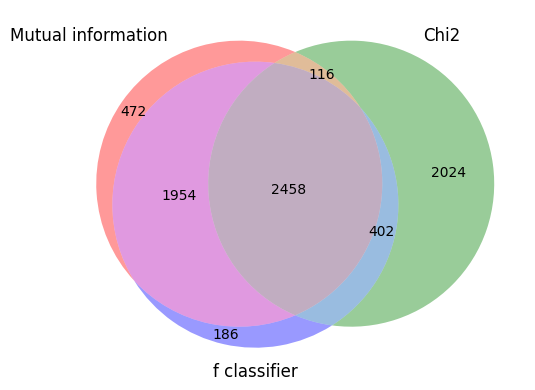

In [48]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
v=venn3(subsets = (472, 2024, 116, 186,1954,402,2458), set_labels = ('Mutual information', 'Chi2', 'f classifier'))
#v.get_label_by_id('A').set_text('My Favourite group!')
plt.show()

#### Questions

- Décrivez le dataset MILE et son contenu. D'où vient-il et quel est son but ? Que représentent les données ? Donnez des informations sur les variables indépendantes, sur la variable dépendante, la tâche de machine learning à effectuer etc. 
- Donnez une description des trois méthodes utilisées pour le premier filtre
- Pourquoi utiliser des méthodes simples commes celles-ci pour une première étape de filtre ?
- Nous choisissons de garder l'union des intersections des features (création du DF ci-dessous). D'après vous, pourquoi faire ce choix plutôt que de garder la totalité des features sélectionnées par les trois méthodes (union) ou les features en commun entre les trois méthodes (intersection) ?




Réponses:

Le dataset MILE (Microarray Innovations in LEukemia) a été utilisé dans une étude pour diagnostiquer la leucémie en fonction d'expressions de gènes. Ce dataset contient 2096 échantillons de sang ou de moelle épinière de patients de leucémie chronique. Chaque variable à l'exception de la classe de leucémie (`leukemia_class`) est l'expression du gène qui a le même nom que le champ.

Mutual information : L'information mutuelle entre deux variables aléatoires est une valeur non négative qui mesure la dépendance entre les variables. Elle est égale à zéro si et seulement si deux variables aléatoires sont indépendantes, et des valeurs plus élevées signifient une plus grande dépendance. La fonction s'appuie sur des méthodes non paramétriques basées sur l'estimation de l'entropie à partir des distances entre les k-voisins les plus proches.

Chi Squared (chi2) : Ce score peut être utilisé pour sélectionner les caractéristiques `n_features` présentant les valeurs les plus élevées pour la statistique chi-carré de test à partir de X, qui ne doit contenir que des valeurs entières non négatives de caractéristiques telles que des booléens ou des fréquences (par exemple, le nombre de termes dans la classification de documents), par rapport aux classes.

F Classifier : Cette méthode calcule la valeur F de l'ANOVA pour l'échantillon fourni. La valeur F de l'ANOVA correspond à la valeur du test F qu'on effectue sur nos données après l'analyse des variances (ANOVA). On doit choisir le nombre N d'attributs qu'on veut garder.

On utilise ces méthodes pour déjà avoir moins d'attributs pour qu'on juge comme étant *relevant* pour que la sélection d'atrributs avec les *wrappers* prenne moins de temps de calcul. On suppose que ces méthodes jugées comme étant simples sont bien pour la première étape parce qu'on veut surtout réduire la dimensionalité.

On a fait ce choix car comme ça on est sûr que les attributs ont été jugées *relevant* par plusieurs méthodes. 

Garder l'union des 3 méthodes n'est pas une bonne idée car on risquerait de prendre des attributs qui ne sont pas vraiment utiles, même si une des 3 méthodes les considère comme tel. 

Le choix de l'intersection n'est pas bon car on limite un peu trop nos attributs, si on a des attributs que 2 des 3 méthodes considèrent comme utiles, on ne va pas les prendre à cause de la dernière méthode qui ne les considère pas.



------

On crée notre DataFrame *df_union_intersect* qui va être utilisé pour la suite du TP. 

In [49]:
# Define the column lists from each method
mutual_columns = features_df_mutual_5000.columns.tolist()
chi2_unique = [col for col in features_df_chi2_5000.columns if col not in mutual_columns]
fc_unique   = [col for col in features_df_fc_5000.columns if col not in (mutual_columns + chi2_unique)]

# Concatenate the selected columns to form the union DataFrame
df_union = pd.concat([
    features_df_mutual_5000[mutual_columns],
    features_df_chi2_5000[chi2_unique],
    features_df_fc_5000[fc_unique]
], axis=1)

# Retain only the features selected by at least two methods (union of intersections)
df_union_intersect = df_union.loc[:, all_features_union_of_intersect]

# Retain only the features selected by all three methods (intersection)
df_intersect = df_union.loc[:, list(all_features_intersect)]

# Move 'leukemia_class' to the last column
leukemia_class = df_union_intersect.pop("leukemia_class")
df_union_intersect["leukemia_class"] = leukemia_class

df_union_intersect

/tmp/ipykernel_2897/750371106.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_union_intersect["leukemia_class"] = leukemia_class


,230424_at,230768_at,202382_s_at,218729_at,203232_s_at,219890_at,206116_s_at,229507_at,210942_s_at,222307_at,...,237460_x_at,221782_at,1556599_s_at,235780_at,209406_at,1557452_at,228570_at,210638_s_at,1560081_at,leukemia_class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM329407,0.331268,0.306986,0.546137,0.475635,0.508969,0.254712,0.276661,0.391140,0.291109,0.343671,...,0.254989,0.502806,0.246377,0.354555,0.455670,0.277111,0.335972,0.678661,0.384211,mature B-ALL with t(8;14)
GSM329408,0.450948,0.323163,0.293921,0.361606,0.178374,0.106468,0.324446,0.346070,0.017561,0.303945,...,0.196411,0.486495,0.528467,0.423193,0.497250,0.373922,0.257741,0.660882,0.308165,mature B-ALL with t(8;14)
GSM329409,0.318763,0.403481,0.369027,0.314639,0.269337,0.398724,0.377411,0.341919,0.057850,0.437838,...,0.258407,0.526856,0.208854,0.502243,0.439005,0.362559,0.229354,0.675383,0.423689,mature B-ALL with t(8;14)
GSM329410,0.361033,0.192589,0.527010,0.396369,0.321070,0.122636,0.155031,0.373303,0.154414,0.468694,...,0.175936,0.458179,0.315897,0.470738,0.554640,0.370452,0.063168,0.612337,0.154018,mature B-ALL with t(8;14)
GSM329411,0.294387,0.103624,0.302551,0.551392,0.372645,0.546969,0.403817,0.237433,0.312112,0.530691,...,0.394285,0.425787,0.258531,0.485888,0.096170,0.347922,0.468605,0.766922,0.425164,mature B-ALL with t(8;14)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM331728,0.241402,0.243356,0.458162,0.611733,0.439574,0.657115,0.461266,0.324839,0.444375,0.429124,...,0.238627,0.393475,0.204550,0.442925,0.412610,0.329338,0.341373,0.782171,0.294165,Non-leukemia and healthy bone marrow
GSM331729,0.286244,0.256870,0.443485,0.612496,0.470756,0.644453,0.488208,0.261068,0.454338,0.425475,...,0.046350,0.392964,0.308635,0.446529,0.416076,0.231100,0.367622,0.787879,0.339199,Non-leukemia and healthy bone marrow
GSM331730,0.308497,0.314512,0.506532,0.830107,0.499705,0.615640,0.581173,0.332442,0.405370,0.375568,...,0.241842,0.377044,0.110269,0.385209,0.435148,0.234115,0.371560,0.762706,0.277079,Non-leukemia and healthy bone marrow


---

## 2) Wrapper methods


Nous allons maintenant utiliser deux *wrapper methods* afin de réduire notre sélection d'environ 5'000 attributs à environ 500 (ordre de grandeur). Pour cela nous allons utiliser la Recurisve Features Elimination (RFE) de scikit-learn avec Random Forest et Support Vector Machine. 

(*Note: sans Cross Validation (rfecv) car très demandant en ressources*)


- Répondez aux questions 
- RFE-RF: Exécutez le code donné et répondez aux questions
- RFE-SVM: Complétez le code demandé et répondez aux questions
- Sélectionnez les features que vous garderez pour la prochaine étape

---

#### Questions:

- Écrivez une courte description de ce que sont les méthodes "wrapper" pour la sélection d'attributs. Comment fonctionne RFE (implémentation de sklearn) 
- Pourquoi est-il possible de l'utiliser avec Random Forest et Support Vector Machine (SVM) ?





*Réponse:*

Les "wrapper" sont une méthode qui consiste à utiliser un algorithme d'apprentissage pour trouver les attributs. 

RFE fait un *ranking* des attributs avec l'élimination récursive d'attrbuts. Le but de cette méthode est de choisir des attributs récursivement en considérant des sous-ensembles d'attributs de plus en plus petits. L'estimateur est entraîné sur l'ensemble initial d'attributs et l'importance de chaque attribut est obtenue par le biais d'un attribut spécifique ou d'une variable d'appel. Ensuite, les attributs les moins importantes sont éliminées de l'ensemble actuel d'attributs. Cette procédure est répétée de manière récursive sur l'ensemble élagué jusqu'à ce que le nombre souhaité d'attributs soit atteint.

On peut l'utiliser avec Random Forest et SVM car ces deux méthodes identifient bien l'importance des attributs.


---

In [50]:
# Préparation des données 

X_uoi, y_uoi = df_union_intersect.drop(columns="leukemia_class"), df_union_intersect["leukemia_class"]

X_i, y_i = df_intersect.drop(columns="leukemia_class"), df_intersect["leukemia_class"]

### RFE-RF

Exécuter le code donné ci-dessous. Complétez les commentaires (les # sans rien) dans le code afin d'expliquer ce qui est fait puis répondez aux questions.


<div class="alert alert-block alert-danger">
<b>Attention:</b> Temps d'exécution avec les paramètres actuels: RFE-RF (50 sec) / RFE-SVM (5 minutes avec LinearSVC, 30 secondes avec SVC)
</div>



In [51]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()
#---------------

# RFE avec un classifieur Random Forest avec 25 estimateurs, une profondeur maximale de 10, on veut 500 attributs
selector = RFE(estimator=RandomForestClassifier(random_state=0, 
                                                n_estimators=25, 
                                                max_depth=10), 
               n_features_to_select=500, 
               step=0.02)

# On effectue la sélection d'attributs sur les données
selector = selector.fit(X_uoi, y_uoi)

# Liste des attributs sélectionnées
features_names_RFERF = X_uoi.columns[selector.support_]

#---------------
end = time.time()
print(end - start)

# without step: 1581 sec
# with step: 49 sec

111.09711456298828


#### Question

On cherche à retirer les variables qui sont les plus mauvais prédicteurs. Quelle influence cela a-t-il sur le choix des paramètres de notre RandomForestClassifier ? En d'autres termes: Que changeriez-vous si vous utilisiez Random Forest pour créer un modèle performant au lieu de l'utiliser pour éliminer les plus mauvaises features ?



*Réponse*

Le nombre d'estimateurs et la profondeur maximale sont les paramètres à changer si on voulait faire un modèle performant.

---
### RFE-SVM

En vous basant sur le code de RFE-RF ci-dessus, écrivez le code pour une RFE avec cette fois-ci l'estimateur SVM. 

Utilisez les paramètres suivant:
- Pour RFE: 
    - estimator = SVC
    - N_features: 500
    - step=0.05


- Pour SVC
    - Kernel = 'linear'
    - C=1
    - max_iter=1000

Gardez les noms des 500 features choisies dans une variable nommée *features_names_RFESVM*. 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

selector_svm = RFE(estimator=SVC(kernel='linear', C=1, max_iter=1000), 
               n_features_to_select=500, 
               step=0.05)

selector_svm = selector_svm.fit(X_uoi, y_uoi)

# Liste des attributs sélectionnées
features_names_RFESVM = X_uoi.columns[selector_svm.support_]

### Features retenues par les deux méthodes

Créez une liste nommée "**features_names_wrapper**" avec l'**union** des features retenues. Vous devriez obtenir environ 8-900 features en tout. Affichez vos résultats.


In [53]:
# Union des features de features_names_RFESVM et features_names_RFERF

features_names_wrapper = features_names_RFERF.copy()
features_names_wrapper.union(features_names_RFESVM)

print(len(features_names_wrapper))

features_names_wrapper

500


Index(['202382_s_at', '206116_s_at', '213096_at', '229610_at', '211211_x_at',
       '1552634_a_at', '211126_s_at', '226635_at', '243000_at', '223120_at',
       ...
       '201664_at', '244876_at', '221773_at', '204060_s_at', '224791_at',
       '200832_s_at', '229967_at', '220588_at', '1556599_s_at', '228570_at'],
      dtype='object', length=500)

### 


### Questions

- Pourquoi garder les ~8-900 features issues de l'union et pas uniquement les ~100 de l'intersection ?
- Dans un contexte plus réél avec du temps et des ressources en quantité, comment auriez-vous amélioré l'utilisation de RFE pour faire une sélection encore plus pértinente de variables ?




----

*Réponse:* on garde l'union pour ne pas "louper" des attributs qui ont été trouvées par une méthode mais pas l'autre. On a 500 features, ce qui nous paraît un peu bizarre car cela signifie que nos deux méthodes ont trouvé exactement la même chose.

On aurait pu utiliser RFECV pour faire de la cross-validation

---

## 3) Embedded


### Préparation des données

Exécutez le code ci-dessous.




In [54]:
# Préparation des données: reprendre df_union_intersect et ne prendre que les colonnes qui sont dans features_names_wrapper
from sklearn.model_selection import train_test_split


X = df_union_intersect.loc[:, df_union_intersect.columns.intersection(features_names_wrapper)]
y = df_union_intersect["leukemia_class"].to_list()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2) # 80% training and 20% test

print("-----------")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")
print("-----------")

-----------
X_train shape: (1676, 500)
X_test shape: (420, 500)
y_train shape: 1676
y_test shape: 420
-----------


### Random Forest

En vous inspirant de l'utilisation faite de Random Forest pour la sélection d'attribut, utilisez [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) pour créer un classificateur avec les données générées ci-dessus. Vous pouvez lire [cet article de DataCamp](https://www.datacamp.com/tutorial/random-forests-classifier-python) si vous voulez vous raffraichir sur Random Forest. 

Une fois le classificateur créé, déterminez son accuracy puis générez la liste de l'importance de chaque feature. Jouez brièvement avec les paramètres possibles améliorer l'accuracy. 

Note: 
- Le paramètre n_jobs=-1 vous permet de paralléliser le travail sur tous vos coeurs. Avec 8 coeurs le travail prend environ 2 minutes. 
- Nous voulons tester l'importance de toutes les features, on va donc toutes les tester: utilisez le paramètre "**max_features=len(X.columns)**"
- Vous pouvez aussi prendre un grand nombre d'estimateurs e.g. "**n_estimators=400**"
- Suivez le code donné en commentaires
- Une fois le modèle entrainé, les "feature importances" sont accessibles dans *rf_clf.feature_importances_*
- Vous pouvez générer une pandas.Series en donnant les noms de features comme indexes et utiliser la fonction sort_values(ascending=False) pour trier les valeurs.

In [55]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, max_features=len(X.columns), n_estimators=400, random_state=0) # COMPLETEZ
rf_clf.fit(X_train, y_train) # COMPLETEZ

y_pred = rf_clf.predict(X_test) # COMPLETEZ

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_imp_RF = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

Accuracy: 0.8642857142857143


#### Questions

- L'algorithme Random Forest va construire un ensemble d'arbres de décisions de petite taille contrairement au Decision Tree Classifier qui va construire un arbre de grande taille. Décrivez les paramètres *n_estimators*, *max_depth* et *min_samples_leaf* de RandomForestClassifier. 

- Décrivez les résultats obtenus. Que représente la "feature importance" ?


n_estimators = nombre d'arbres
max_depth = profondeur maximale de chaque arbre
min_samples_leaf = nombre minimum d'énchantillons qu'une feuille doit contenir, ce paramètre est pour élaguer



### Support Vector Machine - SVC

Comme pour Random Forest, nous voulons ici créer un modèle qui nous permet d'avoir l'importance que chaque feature. Nous alons de nouveau utiliser [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Pour pouvoir obtenir l'importance des features, nous devons utiliser un kernel lineaire. Inspirez-vous du code en commentaires ci-dessous pour créer un classificateur. 

Une fois le classificateur créé, déterminez son accuracy puis générez la liste de l'importance de chaque feature. Jouez avec les paramètres possibles pour trouver une $accuracy > 93\%$. 

Note: 
 
- Les importances d'attributs peuvent être obtenus avec *abs(svc_clf.coef_[0])*
- Les paramètres par défaut donnent déja de bons résultats
- Suppor Vector Machine: SVC = Classificateur, SVR = Régression


In [ ]:
svc_clf = SVC(...) # COMPLETEZ
svc_clf.fit(...) # COMPLETEZ

y_pred = # COMPLETEZ

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
feature_imp_SVC = pd.Series(...).sort_values(ascending=False)

___

## Final feature selection

Nous avons maintenant nos deux *pandas.Series* contenant les features et leurs importances obtenues avec Random Forest et SVM que nous mettons ci-dessous dans un joli DataFrame appelé features_RF_SVC. Après avoir vérifié que tout est dans le bon sens, ce qui normalement ne devrait pas poser problème, faites ceci:

- Pour choisir les features les plus importantes, créez une troisième colonne contenant la **somme des deux autres** puis ordrez par ordre décroissant.

- Sélectionnez en suite les N_first (210) features les plus importantes et récupérez la liste des indexes (df.index). 


In [ ]:
# Crée un DataFrame contenant les importances des features selon chaque méthode

features_RF_SVC = pd.DataFrame(columns = ['Features_imp_SVC', 'Features_imp_RF'])
features_RF_SVC['Features_imp_SVC'] = feature_imp_SVC
features_RF_SVC['Features_imp_RF'] = feature_imp_RF

# Vérifiez que les données ont bien été introduites dans le DataFrame selon le bon indexe

feature_imp_RF.loc["227998_at"]
feature_imp_SVC.loc["227998_at"]
features_RF_SVC.loc["227998_at"]

In [ ]:
features_RF_SVC["nouvelle_colonne"] = # COMPLETEZ

features_RF_SVC.sort_values(...) # COMPLETEZ


N_first = 210

n_first_idx = list(features_RF_SVC.iloc[:N_first,:].index)

print(f"Total selected features: {len(n_first_idx)}")


#### Question

Avant d'évaluer la sélection, discutez de la méthode choisies pour garder les 210 premières variables. Quels sont les avantages ou les inconvénients d'utiliser la somme  des "feature importance" ? Utiliser le ranking (1er, 2ème, etc) représente-t-il une alternative envisageable ? Pourquoi ?


*Réponse:*

---

Nous construisons en suite nos splits de données pour pouvoir entrainer nos models avec les 210 variables les plus pertinentes.

In [ ]:
# Création des données avec les 210 premières features sélectionnées

X_n_first = df_union_intersect.loc[:, n_first_idx]
y_n_first = df_union_intersect["leukemia_class"].to_list()

---
Ci-dessous vous trouverez une fonction pour évaluer vos features sélectionnez. 

### Question : 

- Décrivez rapidement ce que fait la fonction 
- Pourquoi utiliser trois classificateurs différents?
- Comment rendre la méthode d'évaluation plus robuste ? 

*Réponse* :

---

In [ ]:
def evaluate_feature_selection(X, y, show=True):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    
    common_labels = np.unique(y_test)
    
    models = [
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        DecisionTreeClassifier()
    ]
    
    accuracies = []
    combined_cm = None
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))        
        cm = confusion_matrix(y_test, y_pred, labels=common_labels)
        
        # Sum the confusion matrices element-wise.
        if combined_cm is None:
            combined_cm = cm
        else:
            combined_cm += cm
    
    mean_accuracy = np.mean(accuracies)
    
    if show:
        plt.figure(figsize=(6, 5))
        sns.heatmap(combined_cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=common_labels, yticklabels=common_labels)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Combined Confusion Matrix (Sum of all models)")
        plt.show()
    
    print(f"\nMean Accuracy across models: {mean_accuracy:.4f}, with standard deviation: {np.std(accuracies):.4f}")


In [ ]:
# utilisez la fonction pour évaluer la performance de votre sélection de features n_first_idx

# COMPLETEZ

---

## Ensemble Feature Selection

Nous avons exploré trois types de méthodes de sélection de features : filter, wrapper et embedded. Nous avons combiné de différentes manières les résultats obtenus par ces méthodes, approchant ainsi ce qu'on appelle l'ensemble feature sélection, c'est-à-dire l'utilisation et la combinaison de plusieurs méthodes de FS, à l'image de l'ensemble learning.

Nous vous proposons désormais d'utiliser un paquet Python en cours de développement qui automatise les différentes étapes de l'ensemble feature sélection.

Nous avons exploré trois types de méthodes de sélection de features : filter, wrapper et embedded. Nous avons combiné leurs résultats de différentes manières, approchant ainsi l’ensemble feature sélection, qui consiste à utiliser et combiner plusieurs méthodes de FS, à l’image de l’ensemble learning.

Pour automatiser ces différentes étapes, nous vous proposons d’utiliser un paquet Python en cours de développement.

Code disponible sur GitHub : [ensemblefs](https://github.com/arthurbabey/ensemblefs/)  
Documentation : [Accéder à la doc](https://arthurbabey.github.io/ensemblefs/)  


Installation :
```bash
pip install git+https://github.com/arthurbabey/ensemblefs.git
```

Le projet est en cours de développement, si vous observez des bugs ou des améliorations possibles, n’hésitez pas à les signaler !

Voici une rapide présentation de la méthodologie mise en place lors de la sélection avec ensemble dans ce paquet :

1. Utiliser plusieurs sélecteurs pour obtenir des listes de features.  
2. Combiner ces listes via une stratégie de fusion (par défaut, l'union des intersections).  
3. Répéter la sélection N fois pour créer divers groupes, chaque groupe étant la combinaison de plusieurs listes de features.  
4. Calculer des métriques de performance et de stabilité.  
5. Employer une méthode de type Pareto pour optimiser la sélection en fonction de la performance et de la stabilité.  
6. Comparer les groupes, identifier les meilleurs, et retourner leur liste de features.

---

Comme le processus d'ensemble feature sélection peut être couteux en temps nous allons l'utiliser pour la dernière étape : passer des 879 features sélectionner après la méthode embedded jusqu'à une liste final de 210 features. 

In [ ]:
# On récupère les données après l'étape de sélection des features embedded 
RF_SVC_index = list(features_RF_SVC.index)

df_efs = df_union_intersect.loc[:, RF_SVC_index+["leukemia_class"]]
df_efs

Nous allons maintenant créer une instance FeatureSelectionPipeline en définissant chaque attributs. 

In [ ]:
from ensemblefs import FeatureSelectionPipeline

data = df_efs.rename(columns={"leukemia_class": "target"}) # créer une colonne target
data["target"] = data["target"].astype("category").cat.codes # convertir la colonne target en catégorique

fs_methods = ["random_forest_selector", "svm_selector", "lasso_selector", "xgboost_selector"]
merging_strategy = "union_of_intersections_merger"
num_repeats = 5 
task = "classification" 
num_features_to_select = 210
metrics = ["logloss", "f1_score"]
min_group_size = 2
fill = True
random_state = 123
n_jobs = 5

pipeline = FeatureSelectionPipeline(
    data=data, # pandas dataset avec la colonne target
    fs_methods=fs_methods, # list des méthodes de sélection de features, soit en utlisant le nom de la méthode soit en créant un objet de la classe de la méthode de sélection
    merging_strategy=merging_strategy, # stratégie de fusion des features sélectionnées
    num_repeats=num_repeats, # nombre de répétitions pour chaque méthode de sélection de features
    task=task, # classification ou régression
    num_features_to_select=num_features_to_select, # nombre de features à sélectionner
    metrics=metrics, # liste des métrique de performance à utiliser pour évaluer les features sélectionnées (minimum 1)
    min_group_size=min_group_size, # taille minimale du groupe de features sélectionnées
    fill=fill, # combler les features sélectionnées jusqu'à num_features_to_select si la stratégie de fusion ne les atteint pas
    random_state=random_state, # random seed
    n_jobs=n_jobs # nombre de coeurs à utiliser pour le calcul parallèle
)

selected_features, _, _ = pipeline.run() 

In [ ]:
X, y = df_efs[list(selected_features)], df_efs["leukemia_class"]

evaluate_feature_selection(X, y, show=True)

---
Maintenant, essayez de modifier les paramètres pour voir si vous pouvez améliorer les résultats. Vous pouvez ajuster ceux proposés dans la prochaine cellule.

Expérimentez avec différents réglages et expliquez vos choix. Inutile de chercher exhaustivement les meilleurs paramètres, car la méthode est coûteuse en temps de calcul.

Vous pouvez trouver dans le code ou dans la documentations les différents feature selectors possible ainsi que les metrics possible. 

In [ ]:
fs_methods = # COMPLETEZ
metrics = # COMPLETEZ
min_group_size = # COMPLETEZ


pipeline = FeatureSelectionPipeline(
    data=data,
    fs_methods=fs_methods,
    merging_strategy=merging_strategy,
    num_repeats=num_repeats,
    task=task,
    num_features_to_select=num_features_to_select,
    metrics=metrics,
    min_group_size=min_group_size,
    fill=fill,
    random_state=random_state,
    n_jobs=n_jobs
)

selected_features_2, _ , _ = pipeline.run()

*Justification:*

---

In [ ]:
X, y = df_union[list(selected_features_2)], df_union["leukemia_class"]

evaluate_feature_selection(X, y, show=True)

#### Question

- Pourquoi est-il important lors de feature sélection par ensemble d'utiliser des sélecteurs différents? 
- Qu'est-ce que le paramètre min_group_size et comment influence-t-il la sélection des features ? 
- Comparez les résultats obtenus lors de l'évaluation de selected_features et selected_features_2

*Réponse:*


---

## Visualisation et analyse

- Analyser une des matrices de confusion calculée ci-dessus. Quelle erreure de prédiction peut être plus grave que d'autres ? 
- On vous donne ci-dessous la liste des 210 variables les plus pértinentes obtenues lors d'un projet d'une durée de 3 ans avec beaucoup plus de moyens (temps, ressources, experts médicaux, etc). Comparez cette liste avec les listes obtenues dans ce TP (les 210 obtenus après toute les étapes et les 210 obtenus avec l'ensemble feature selection) et discutez rapidement les résultats. 




In [ ]:
# Liste des 210 variables
# Comparez avec vos données obtenues
import pickle

# read pickle 
with open("./data/list_210_features.pickle", "rb") as fp:   #Pickling
    b = pickle.load(fp)
    
print(b)

*Réponse:*

---

Fin